# Data exploration and visualisation

## Content:
### <a href="https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/">Suicide Rates Overview 1985 to 2016 </a>
* This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.
* <b>Sources</b>:
<ul> <li><a href="http://hdr.undp.org/en/indicators/137506">United Nations Development Program. (2018). Human development index (HDI). </a> </li>
     <li><a href="http://databank.worldbank.org/data/source/world-development-indicators#">World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. </a> </li>
     <li><a href="https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook">[Szamil]. (2017). Suicide in the Twenty-First Century [dataset] </a></li>
     <li><a href="http://www.who.int/mental_health/suicide-prevention/en/">World Health Organization. (2018). Suicide prevention</a></li> </ul>

## Structure
This notebook is seperated into four parts:
<ol><li>Set-up of the notebook and data</li>
<li>A rough exploration of the Data</li>
<li>Visualizing the Data</li>
<li>Conclusion</li></ol>

## Goal
* General exploration of the data
* Deeper focus on Germany
* What factors could be responsible for the change in the suicide-rate?



## 1. Setup:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# print(plt.style.available)
plt.style.use("seaborn-whitegrid")

In [2]:
df = pd.read_csv(r"C:\Users\JC Jones\Python\Datensets & SQL-Datenbanken\suicide-rates-overview-1985-to-2016\master.csv")

## 2. Data Exploration

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns")

The DataFrame has 27820 rows and 12 columns


## 2.1 Missing values

In [5]:
print("The only column missing values is the HDI column:")
df.isna().sum()

The only column missing values is the HDI column:


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
percent = 100*(df["HDI for year"].isna().sum()/len(df["HDI for year"]))
print(f"% of missing values for HDI: {percent:.2f}")

% of missing values for HDI: 69.94


## 2.2 A first look at the columns

In [7]:
# global variable for ljust
SPACE=25

# alphabetically first and last unique country
amount_countries = len(df.country.unique())
first_country, last_country = df.country.unique()[0], df.country.unique()[-1]

# oldest and latest year of the dataset
start_year, stop_year = df.year.min(), df.year.max()

# amount of male and female entries in dataset
male, male_num = df.sex.value_counts().index[0], df.sex.value_counts()[0]
female, female_num = df.sex.value_counts().index[1], df.sex.value_counts()[1]

# amount of unique age-groups
group_amount = len(df.age.unique())
age_groups = df.age.unique()

# suicide mean and std
av_suicides, std_suicides = int(df.suicides_no.mean()), int(df.suicides_no.std())

# countries with lowest and highest population
pop_df = df.groupby(["country", "year"]).sum().loc[:,"population"]
low_pop, high_pop = pop_df.loc[pop_df==pop_df.min()], pop_df.loc[pop_df==pop_df.max()]

# country and year for lowest and highest gdp per capita
l_gdp = df["gdp_per_capita ($)"].min()
l_gdp_country = df["year"][df["gdp_per_capita ($)"] == df["gdp_per_capita ($)"].min()].sample(1).values[0]
l_gdp_year = df["country"][df["gdp_per_capita ($)"] == df["gdp_per_capita ($)"].min()].sample(1).values[0]
h_gdp = df["gdp_per_capita ($)"].max()
h_gdp_country = df["year"][df["gdp_per_capita ($)"] == df["gdp_per_capita ($)"].max()].sample(1).values[0]
h_gdp_year = df["country"][df["gdp_per_capita ($)"] == df["gdp_per_capita ($)"].max()].sample(1).values[0]

# amount of unique generations
listed_gens = df.generation.unique()

print("Column country".ljust(SPACE) + f": {amount_countries} unique countrys ranging from {first_country} to {last_country}")
print("Column year".ljust(SPACE) + f": The data begins with the year {start_year} and extends to {stop_year}")
print("Column sex".ljust(SPACE) + f": The dataset contains {male_num} {male} and {female_num} {female} groups")
print("Column age".ljust(SPACE) + f": Is seperated into {group_amount} groups: ")
print(" ".ljust(SPACE + 1), ", ".join(age_groups))
print("Column suicides_no".ljust(SPACE) + f": The average country has {av_suicides} suicides at a standard deviation of {std_suicides}")
print("Column population".ljust(SPACE) + f": Lowest pop: Kiribati with {low_pop.values[0]} people (5 or older) in {low_pop.index[0][1]}")
print(" ".ljust(SPACE + 1), f"Highest pop: United States with {high_pop.values[0]} people (5 or older) in {high_pop.index[0][1]}")
print(".".center(SPACE))
print(".".center(SPACE))
print("Column gdp_per_capita ($)".ljust(SPACE) + ": Lowest gdp per capita: ", l_gdp_country, "in",  l_gdp_year, "with", l_gdp)
print(" ".ljust(SPACE + 1), "Highest gdp per capita: ", h_gdp_country, "in",  h_gdp_year, "with", h_gdp)
print("Column generation".ljust(SPACE-1), ":", ", ".join(listed_gens))

Column country           : 101 unique countrys ranging from Albania to Uzbekistan
Column year              : The data begins with the year 1985 and extends to 2016
Column sex               : The dataset contains 13910 male and 13910 female groups
Column age               : Is seperated into 6 groups: 
                           15-24 years, 35-54 years, 75+ years, 25-34 years, 55-74 years, 5-14 years
Column suicides_no       : The average country has 242 suicides at a standard deviation of 902
Column population        : Lowest pop: Kiribati with 25192 people (5 or older) in 1999
                           Highest pop: United States with 300078511 people (5 or older) in 2015
            .            
            .            
Column gdp_per_capita ($): Lowest gdp per capita:  1992 in Albania with 251
                           Highest gdp per capita:  2014 in Luxembourg with 126352
Column generation        : Generation X, Silent, G.I. Generation, Boomers, Millenials, Generation Z


## 3. Visualization

## 3.1 Suicides by year for some Countrys

In [8]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


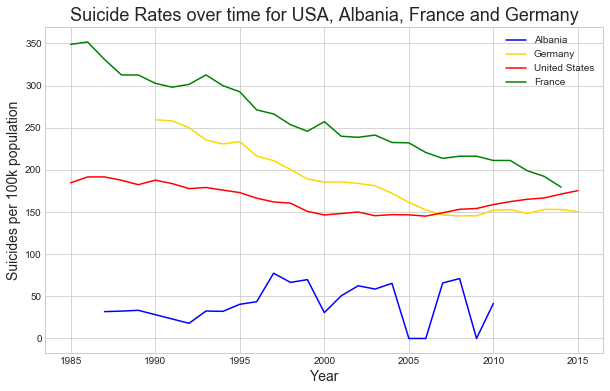

In [9]:
# creating colorcode for countries 
country_colors = {"Albania": "blue", "Germany": "gold", "United States": "red", "France": "green"}

# size of figure
plt.figure(figsize=(10,6))

# plotting: x - year, y - suicides/100k pop, for Albania, Germany, US and France
countries = ["Albania", "Germany", "United States", "France"]
for i in countries:
    country_series =  df.groupby(["country", "year"]).sum().loc[i,"suicides/100k pop"]
    plt.plot(country_series, color=country_colors[i])

# adjusting plot
plt.legend(["Albania", "Germany", "United States", "France"])
plt.title("Suicide Rates over time for USA, Albania, France and Germany", fontdict={"fontsize":18})
plt.xlabel("Year", fontdict={"fontsize":14})
plt.ylabel("Suicides per 100k population", fontdict={"fontsize":14})
plt.xticks()
plt.show()

In [10]:
# showing NA values for Albania in 2005, 2006 and 2009
df[(df["country"]=="Albania")&(df["year"].isin([2005,2006,2009]))].sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
243,Albania,2009,female,5-14 years,0,236174,0.0,Albania2009,NaN,"12,044,212,904",4387,Generation Z
248,Albania,2009,male,35-54 years,0,374365,0.0,Albania2009,NaN,"12,044,212,904",4387,Boomers
205,Albania,2006,female,25-34 years,0,186391,0.0,Albania2006,NaN,"8,992,642,349",3235,Generation X
192,Albania,2005,female,15-24 years,0,281922,0.0,Albania2005,0.695,"8,158,548,717",2931,Millenials
193,Albania,2005,female,25-34 years,0,190745,0.0,Albania2005,0.695,"8,158,548,717",2931,Generation X


<b>Interpretation:</b>
* While <b>France</b> had the highest sucidie-rate of the four countries in the 1980s, it  managed to <b>steadily decrease the number of suicides</b>. 
* The <b>United States</b> started off with a comparably low number of suicides but <b>somewhere between 2005 and 2008</b> their suicide-rate began to <b>rise again</b>.
* Like France, <b>Germany</b> also <b>reduced</b> the number of people committing <b>suicide</b>.
* <b>Albania</b> is <b>dropped from further exploration</b> due to the lack of data in 2005, 2006 and 2009

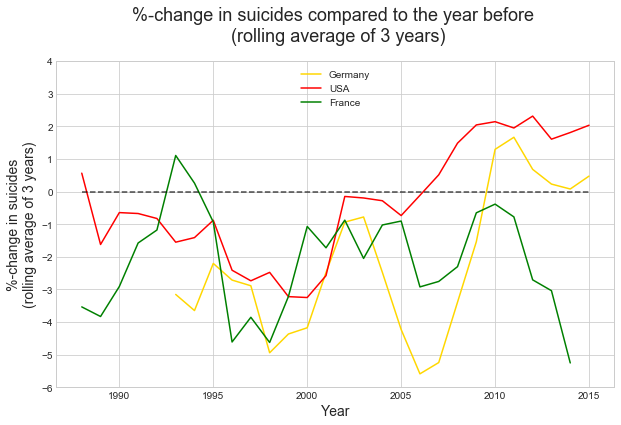

In [11]:
# Setting global variable for .rolling()
NUM = 3

# size of figure
plt.figure(figsize=(10,6))

# Plotting: x - year, y - %-change of suicides(rolling average), for France, US and Germany
countries = ["Germany", "United States", "France"]
for i in countries:
    country_series =  df.groupby(["country", "year"]).sum().loc[i,"suicides/100k pop"]
    country_perc = (country_series/country_series.shift(1)-1).rolling(NUM).mean()*100
    plt.plot(country_perc, color=country_colors[i])

# adjusting plot
plt.plot([1985+NUM,2015],[0,0], linestyle="--", color="k", alpha=0.7)
plt.legend(["Germany", "USA", "France"], loc="upper center")
plt.yticks(ticks=np.arange(-6,5))
plt.xlabel("Year", fontdict={"fontsize":14})
plt.ylabel(f"%-change in suicides\n(rolling average of {NUM} years)", fontdict={"fontsize":14})
plt.title(f"%-change in suicides compared to the year before \n (rolling average of {NUM} years)", fontdict={"fontsize": 18}, pad=20, loc="center")

plt.show()

<b>Interpretation:</b>
* <b>France</b> managed to <b>steadily decrease</b> their suicide-number with only a slight increase in the 1990s.
* <b>Germany</b> on the other hand had <b>a good run between 1990 and 2009</b>. <b>From 2010 onwards</b> its suicide-rate per 100k capita started to <b>slowly increase</b> again.
* The <b>United States</b> reduced their suicide-rate steadily until <b>somewhere between 2005 and 2008</b> where their suicide-rate began to <b>rise again</b>.


## 3.2 Suicides for different age-groups in Germany

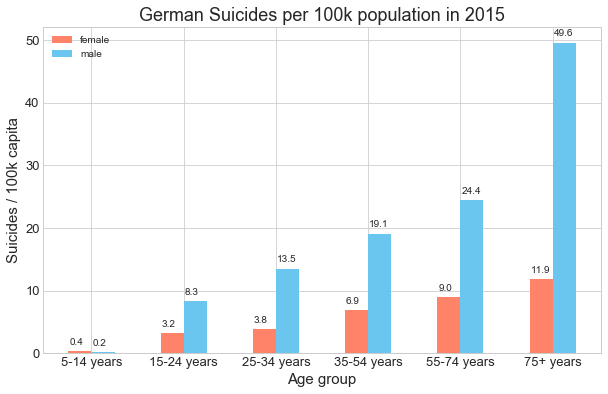

In [12]:
# colorcode for female and male
color = {"f": "#ff8368", "m": "#6ac5ef"}

# filtering the dataframe towards Germany, 2015 and male/female 
gdf = df[df.country=="Germany"]
g2015 = gdf.loc[gdf["year"]==2015,]
g2015_suicides = g2015.loc[:,["age", "sex", "suicides/100k pop"]].groupby(["age", "sex"]).sum()
g2015_suicides = g2015_suicides.reindex(["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"], level=0)
g2015_suicides_arr = g2015_suicides.values.reshape(6,2)

# size of figure + adjusting parameters of plot
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=13)

# plotting: x - agegroup, y - suicides/100k pop, for gender
for i in range(0,6):
    plt.bar(i-0.25, g2015_suicides_arr[i,0], color=color["f"],width=0.25, align="edge")
    plt.bar(i, g2015_suicides_arr[i,1], color=color["m"],width=0.25, align="edge")

# showing the numbers above the bars
for num, i in enumerate(ax.patches):
    if num%2==0:
        ax.text(i.get_x()+0.01, i.get_height()+1, str(round(i.get_height(),1)))
    else:
        ax.text(i.get_x()+0.01, i.get_height()+1, str(round(i.get_height(),1)))
        
# adjusting plot
plt.xticks(np.arange(0,6), labels=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
plt.legend(["female", "male"])
plt.title("German Suicides per 100k population in 2015", fontdict={"fontsize":18})
plt.xlabel("Age group", fontdict={"fontsize": 15})
plt.ylabel("Suicides / 100k capita", fontdict={"fontsize": 15})
plt.show()

In [13]:
# calulating ratio for male to female suicides/100k pop in 2015
ratio = []
for i in range(6):
    ratio.append(g2015_suicides_arr[i,1]/g2015_suicides_arr[i,0])
    
pd.DataFrame(index=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"], data={"Ratio of male to female suicides in 2015":np.around(ratio, decimals=2)})

,Ratio of male to female suicides in 2015
5-14 years,0.43
15-24 years,2.57
25-34 years,3.55
35-54 years,2.78
55-74 years,2.70
75+ years,4.17


<b>Interpretation:</b>
* Judging from the latest datapoints (2015), the <b>suicide-rate</b> in Germany was at its <b>lowest</b> in the group of <b>5-14 years old</b> and <b>steadily increased with growing age</b>.
* Generally speaking, <b>males</b> were multiple times <b>more likely to commit suicide</b> (in 2015) . 

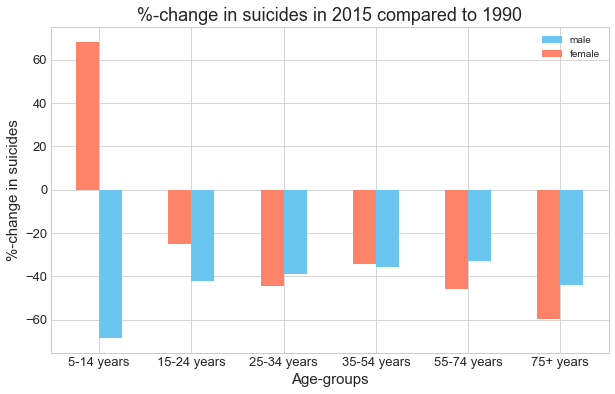

In [14]:
# colorcode for female and male
COLOR = {"f": "#ff8368", "m": "#6ac5ef"}

# filtering dataframe
country = df.country == "Germany"
y_min, y_max = df.loc[(country), "year"].min(), df.loc[(country), "year"].max()

# initiating and filling dict with relevant data
d = {year: {age: {gender:[] for gender in df.sex.unique()} for age in ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]} for year in (y_min, y_max)}
for gender in df.sex.unique():
    for i in ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]:
        d[y_min][i][gender].append(df.loc[(country)&(df.age==i)&(df.year==y_min)&(df.sex==gender), "suicides/100k pop"].values[0])
        d[y_max][i][gender].append(df.loc[(country)&(df.age==i)&(df.year==y_max)&(df.sex==gender), "suicides/100k pop"].values[0])

        
# size of figure
plt.figure(figsize=(10,6))

# plotting: x - agegroups, y - %change between y_min and y_max, for gender
c=0
for age in ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]:
    for num, gender in enumerate(df.sex.unique()):
        rate = ((d[y_max][age][gender][0]/d[y_min][age][gender][0])-1)*100
        
        if gender=="female":
            plt.bar(c-0.25, rate, color=COLOR["f"],width=0.25, align="edge")
        else:
            plt.bar(c, rate, color=COLOR["m"],width=0.25, align="edge")
        if num == 1:
            c+=1

# adjusting plot
plt.title(f"%-change in suicides in {y_max} compared to {y_min}", fontsize=18)
plt.ylabel(f"%-change in suicides", fontdict={"fontsize":15})
plt.xlabel("Age-groups", fontdict={"fontsize":15})
plt.xticks(ticks=np.arange(0,6), labels=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"], fontsize=13)
plt.yticks(fontsize=13)
plt.legend(df.sex.unique())
plt.show()

<b>Interpretation:</b>
* Almost all age-groups were <b>less likely to commit suicide</b> in 2015 compared to 1990. 
* Only the category of <b>girls between 5 and 14 years</b> saw a sharp <b>increase in suicides</b> in 2015 compared to 1990.
* The age-group of <b>5-14 year old boys</b> saw the <b>highest percentual decrease</b> in suicides.
* In relative terms women aged 25 and older saw a higher percentual decrease of their suicide-rate than their male counterparts.

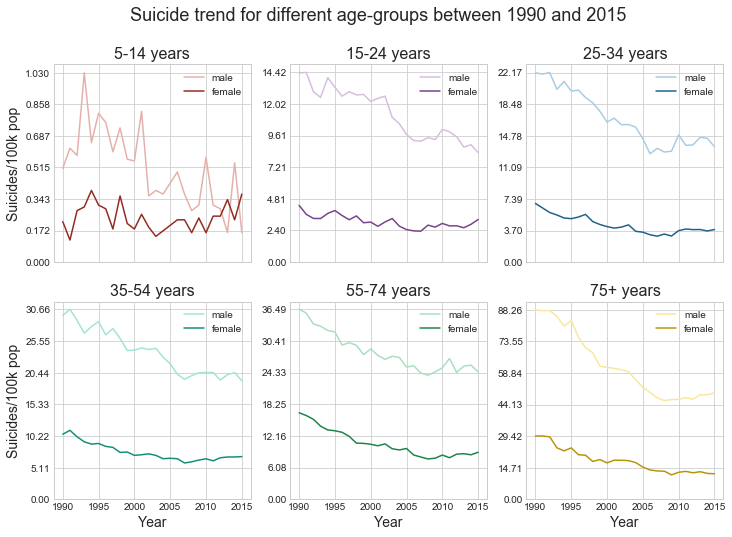

In [15]:
# colorcode for agegroup and gender
col = {"5-14 years": {"m":  "#e6b0aa" , "f": "#922b21"}, "15-24 years": {"m": "#d7bde2", "f": "#76448a"}, 
          "25-34 years": {"m": "#a9cce3", "f": "#1f618d"}, "35-54 years": {"m": "#a3e4d7", "f": "#148f77"}, 
          "55-74 years": {"m": "#a9dfbf", "f": "#1e8449"}, "75+ years": {"m": "#f9e79f", "f": "#b7950b"}}

# size of figure and amount of axes
fig, ax = plt.subplots(2,3, figsize=(12,8), sharex=True)
ax = ax.flatten()

# plotting: x - year, y - suicides/100k capita, for agegroup and gender
age_groups = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
for num, age_group in enumerate(age_groups):
    
    condition = (df["age"]==age_group)&(df["country"]=="Germany")
    group_df = df.loc[condition, ["suicides/100k pop", "sex", "year"]]    
    
    y_min, y_max = group_df.year.min(), group_df.year.max()
    timespan = np.arange(y_min, y_max+1)
    
    male_df = group_df.loc[group_df.sex=="male", "suicides/100k pop"]
    female_df = group_df.loc[group_df.sex=="female", "suicides/100k pop"]
    
    ax[num].plot(timespan, male_df, color=col[age_group]["m"])
    ax[num].plot(timespan, female_df, color=col[age_group]["f"])

    ax[num].set_title(age_group, fontdict={"fontsize": 16})
    if num > 2:
        ax[num].set_xlabel("Year", fontdict={"fontsize": 14})
    if num % 3 ==0:
        ax[num].set_ylabel("Suicides/100k pop", fontdict={"fontsize": 14})
    ax[num].legend(["male", "female"])
    ax[num].set_yticks(ticks=np.linspace(0,np.maximum(male_df, female_df).max(),7))

# adjusting plot
plt.suptitle(f"Suicide trend for different age-groups between {y_min} and {y_max}", fontsize=18)
plt.show()

<b>Interpretation:</b>
* The graphs show a <b>downward trend</b> for most of the age-groups.
* In absolute terms, the male population saw a higher decrease in suicides.

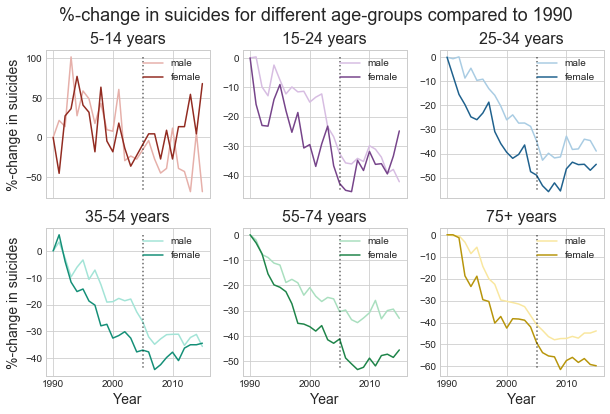

In [16]:
# size of figure and amount of axes
fig, ax = plt.subplots(2,3, figsize=(10,6), sharex=True)
ax = ax.flatten()


for num, age_group in enumerate(age_groups):
    
    # filtering the dataframe
    condition    = (df["age"]==age_group)&(df["country"]=="Germany")
    group_df     = df.loc[condition, ["suicides/100k pop", "sex", "year"]]     
    male_df      = group_df.loc[group_df.sex=="male", "suicides/100k pop"]
    female_df    = group_df.loc[group_df.sex=="female", "suicides/100k pop"]
    
    
    # creating the data for the x-axis
    y_min, y_max = group_df.year.min(), group_df.year.max()
    timespan     = np.arange(y_min, y_max+1)
    
    
    # plotting the male and female lineplot
    maleplot = (male_df/male_df.iloc[0]-1)*100
    femaleplot = (female_df/female_df.iloc[0]-1)*100
    
    ax[num].plot(timespan, maleplot, color=col[age_group]["m"])
    ax[num].plot(timespan, femaleplot, color=col[age_group]["f"])
    ax[num].set_title(age_group, fontdict={"fontsize": 16})
    ax[num].legend(["male", "female"], loc="upper right")
                 
    if num > 2:
        ax[num].set_xlabel("Year", fontdict={"fontsize": 14})
    if num % 3 ==0:
        ax[num].set_ylabel(f"%-change in suicides", fontdict={"fontsize": 14})
    
    # horizontal line at year 2005
    ax[num].plot([2005,2005],[np.maximum(maleplot.max(), femaleplot.max()), np.minimum(maleplot.min(), femaleplot.min())], linestyle=":",  color="k", alpha = 0.6)

# adjusting the plot
fig.suptitle(f"%-change in suicides for different age-groups compared to 1990", fontsize=18)
plt.show()

<b>Interpretation:</b>
* The general trend shows a <b>dercrease in the number of suicides</b>.
* At a closer look, starting from <b>~ 2005 the slope seems to flatten</b> for most of the age-groups. 

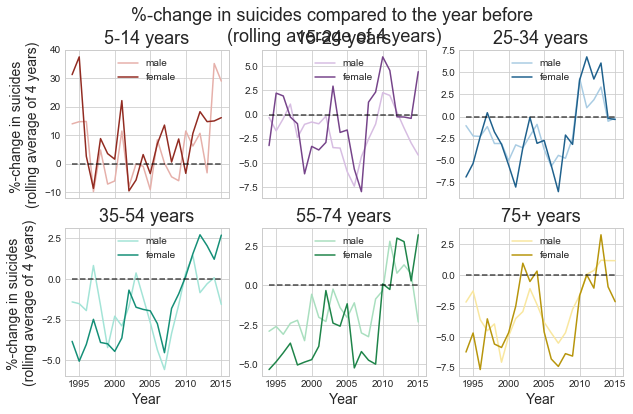

In [17]:
# Setting global variable for .rolling()
ROLL_NUM = 4

# size of figure and amount of axes
fig, ax = plt.subplots(2,3, figsize=(10,6), sharex=True)
ax = ax.flatten()

# plotting: x - year, y - %change of suicides(rolling average), for gender and agegroup
for num, age_group in enumerate(age_groups):
    
    condition = (df["age"]==age_group)&(df["country"]=="Germany")
    group_df = df.loc[condition, ["suicides/100k pop", "sex", "year"]]    
    
    male_df = group_df.loc[group_df.sex=="male", "suicides/100k pop"]
    female_df = group_df.loc[group_df.sex=="female", "suicides/100k pop"]
    
    y_min, y_max = group_df.year.min(), group_df.year.max()
    timespan = np.arange(y_min, y_max+1)
    
    ax[num].plot(timespan, ((male_df/male_df.shift(1)-1)*100).rolling(ROLL_NUM).mean(), color=col[age_group]["m"])
    ax[num].plot(timespan, ((female_df/female_df.shift(1)-1)*100).rolling(ROLL_NUM).mean(), color=col[age_group]["f"])

    ax[num].set_title(age_group, fontdict={"fontsize": 18})
    if num > 2:
        ax[num].set_xlabel("Year", fontdict={"fontsize": 14})
    if num % 3 ==0:
        ax[num].set_ylabel(f"%-change in suicides \n(rolling average of {ROLL_NUM} years)", fontdict={"fontsize": 14})
    if num > 0:
        ax[num].set_yticks(np.linspace(-10, 10, 9))
    ax[num].legend(["male", "female"], loc=9)
    
    ax[num].plot([y_min+ROLL_NUM, y_max], [0,0], linestyle="--", color="k", alpha=0.7)

# adjusting plot
fig.suptitle(f"%-change in suicides compared to the year before \n(rolling average of {ROLL_NUM} years)", fontsize=18)
plt.show()

<b>Interpretation:</b>
* The rolling 4 year average shows as well that <b>somewhere between 2005 and 2010 the <i>%-change in suicides compared to the year before</i> started to increase again</b>.
* This leads to the question of why the suicide-rate stopped dropping further/started to slowly increase again.
* In the following I will explore if the dataset offers some kind of explanation.

## 3.3 Factors that could impact the Suicides/100k capita in Germany?

In [18]:
# filtering the dataset
condition = df.country=="Germany"
corrdf = df.loc[(condition)&(df.year<2016)].groupby("year").agg({"suicides/100k pop": sum, "population": np.mean,  "gdp_per_capita ($)": np.mean, "HDI for year": np.mean})
corrdf.tail()

,suicides/100k pop,population,gdp_per_capita ($),HDI for year
year,,,,
2011,152.82,6.530928e+06,47947,0.911
2012,148.31,6.542343e+06,45142,0.915
2013,153.08,6.439249e+06,48563,0.915
2014,153.04,6.462697e+06,50167,0.916
2015,150.34,6.511390e+06,43201,NaN


In [19]:
print("The columns 'population' and 'suicides_no' and 'suicides/100k pop' are self explanatory.")
print("The column 'gdp_per_capita ($)' shows the Gross domestic product per capita for Germany at a certain year.")
print(f"The column 'HDI for year' shows the Human Development Index for Germany at a certain year. Wikipedia link to HDI: https://en.wikipedia.org/wiki/Human_Development_Index")

# calculating % of missing values for column "HDI for year"
missing_vals = len(corrdf[corrdf["HDI for year"].isna()])/len(corrdf)
print(f"\n{missing_vals*100:.2f} % of values for column 'HDI for year' are missing")

The columns 'population' and 'suicides_no' and 'suicides/100k pop' are self explanatory.
The column 'gdp_per_capita ($)' shows the Gross domestic product per capita for Germany at a certain year.
The column 'HDI for year' shows the Human Development Index for Germany at a certain year. Wikipedia link to HDI: https://en.wikipedia.org/wiki/Human_Development_Index

65.38 % of values for column 'HDI for year' are missing


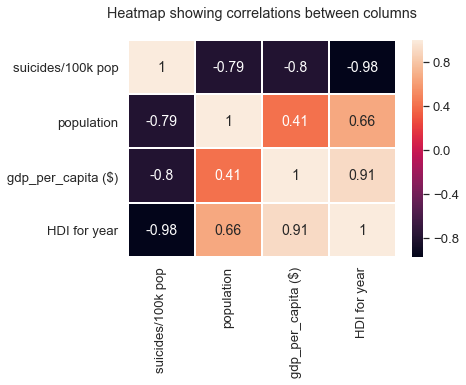

In [20]:
# increasing size of font
sns.set(font_scale=1.2)

# plotting correlations of columns with heatmap
g = sns.heatmap(corrdf.corr(), linewidth=1, annot=True, annot_kws={"fontsize":14})
plt.title("Heatmap showing correlations between columns\n")
plt.show()

<b>Interpretation:</b>
* Due to the amount of missing data in "HDI for year" this column is not meaningful
* There might be a <b> negative correlation between suicides/100k pop and gdp per capita</b>
* According to the heatmap, an increase in population correlates with a decrease in suicides. I dont think there is a direct connection between those two columns because an increase in population should lead to a proportional increase in the amount of suicides. Maybe better living conditions lead to an increase in population and to a decrease in suicides and that is why population and suicides seem to correlate.

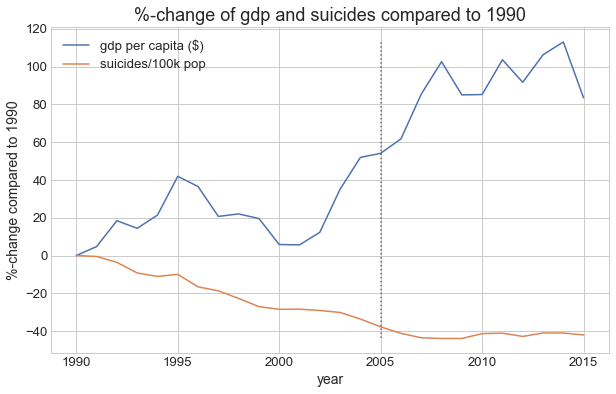

In [21]:
# size of figure and amount of axes + plottingstyle
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(1,1, figsize=(10,6))

# filtering values to plot
gdp_y_min = (corrdf["gdp_per_capita ($)"]/corrdf["gdp_per_capita ($)"].iloc[0]-1)*100
suicides_y_min = (corrdf["suicides/100k pop"]/corrdf["suicides/100k pop"].iloc[0]-1)*100

# plotting: x - year, y - gdp_per_capita/suicides/100k pop, in relative terms towards y_min
ax.plot(gdp_y_min, label="gdp per capita ($)")
ax.plot(suicides_y_min, label="suicides/100k pop")
ax.set_title("%-change of gdp and suicides compared to 1990", fontdict={"fontsize": 18})
ax.plot([2005, 2005], [suicides_y_min.min(), gdp_y_min.max()], ":k", alpha=0.6)
ax.set_xlabel("year", fontdict={"fontsize": 14})
ax.set_ylabel("%-change compared to 1990", fontdict={"fontsize": 14})
ax.legend()

plt.show()

<b>Interpretation:</b>
* Around the year 2005 the <b>suicide rate</b>begins to <b>hover around the -40% mark</b>.
* The <b>gdp per capita</b> rises a few more years but then begins to <b>hover around the +100 % mark</b>.
* The stagnating gdp might be the explanation as to why the suicide-rate stopped decreasing further.

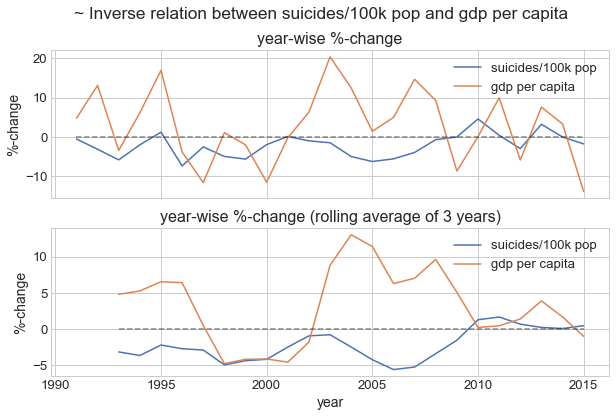

In [22]:
# Setting global variable for .rolling()
ROLL = 3

# Creating values for plot
suicides = (corrdf["suicides/100k pop"]/corrdf["suicides/100k pop"].shift(1)-1)*100
gdp = (corrdf["gdp_per_capita ($)"]/corrdf["gdp_per_capita ($)"].shift(1)-1)*100
suicides_roll = suicides.rolling(ROLL).mean()
gdp_roll      = gdp.rolling(ROLL).mean()


# Plotting 
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(2,1, figsize=(10,6), sharex=True)

ax[1].plot(suicides_roll, label="suicides/100k pop")
ax[1].plot(gdp_roll, label="gdp per capita")
ax[1].plot([1990+ROLL,2015],[0,0], "--k", alpha=0.5)
ax[1].set_ylabel("%-change", fontdict={"fontsize": 14})
ax[1].set_xlabel("year", fontdict={"fontsize": 14})
ax[1].legend()
ax[1].set_title(f"year-wise %-change (rolling average of {ROLL} years)", fontdict={"fontsize": 16})

ax[0].plot(suicides, label="suicides/100k pop")
ax[0].plot(gdp, label="gdp per capita")
ax[0].plot([1991,2015],[0,0], "--k", alpha=0.5)

ax[0].set_ylabel("%-change", fontdict={"fontsize": 14})
ax[0].legend()
ax[0].set_title(f"year-wise %-change", fontdict={"fontsize": 16})
fig.suptitle("~ Inverse relation between suicides/100k pop and gdp per capita", fontdict={"fontsize": 18})
plt.show()

<b>Interpretation:</b>
* The visualisation of 'suicides/100k pop' and 'gdp per capita' indicates the negative correlation between the two. A percentual increase in gdp per capita seems to lead to a percentual decrease in suicides. Logically, there might be a connection, because a wealthier population might lead a happier life and thus be less likely to commit suicide.

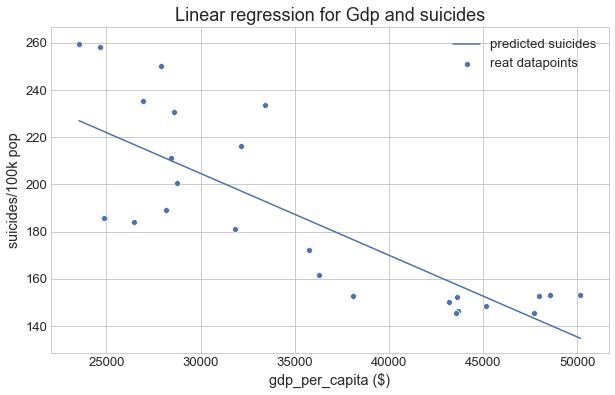

In [23]:
# linear regression for gdp per capita and suicides/100k pop
slope, intercept, rvalue, pvalue, stderr = stats.linregress(corrdf["gdp_per_capita ($)"], corrdf["suicides/100k pop"])

# plotting the linear regression and scattering the actual values
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(corrdf["gdp_per_capita ($)"], slope*corrdf["gdp_per_capita ($)"]+intercept, linestyle=":", label="predicted suicides")
sns.scatterplot(corrdf["gdp_per_capita ($)"], corrdf["suicides/100k pop"], label="reat datapoints")
plt.title("Linear regression for Gdp and suicides", fontdict={"fontsize": 18})
plt.show()

## Conclusion:
* <b>Germany and France</b> managed to <b>decrease their ratio of suicidal people</b>, while the <b>US</b> is roughly at the <b>same ratio as 30 years ago</b>.
* <b>Germany and the USA</b> are seeing an <b>upwards trend in suicides at the moment</b>, while <b>France continues its downward trend</b>.
* In 2015, German <b>men were multiple times more likely to commit</b> suicide than women.
* While every other age-group in Germany was seeing its suicide rate decreasing, <b>girls aged 5-14 were seeing an increase in suicides</b> in 2015 compared to 1990
* The German male population saw a greater absolute decrease in suicides, while the german female population saw a greater relative decrease.
* Between <b>1990 and ~2005</b> most of the age-groups saw a <b>sharper decrease in their suicide rate than from 2005 onwards</b>.
* There <b>might be a negative correlation between suicides/100k capita and gdp per capita</b>. To confirm this hypothesis, more thorough test would be needed. Additionally I am unsure whether the gdp is adjusted for inflation or not.
* The <b>linear regression</b> for gdp_per_capita and suicides/100k pop predicts that with a <b>rising GDP the suicide-rate decreases</b>.